In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pytz
import datetime
import os
from tqdm.auto import tqdm
import seaborn as sns
from scipy.stats import zscore

In [133]:
base_dir = "/media/root/data/swiggy/"
data_dir = base_dir + "data_DEL/"
swiggy_data_dir = data_dir + "swiggy_data/"
req_data_dir = data_dir + "required_data/"

plt.rcParams.update({'axes.titlesize': 20})
plt.rcParams.update({'axes.labelsize': 16})

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.5f}'.format

In [59]:
order_files = ['orders_2019-05-01.csv','orders_2019-05-02.csv', 'orders_2019-05-03.csv',
                'orders_2019-05-04.csv', 'orders_2019-05-05.csv', 'orders_2019-05-06.csv',
                'orders_2019-05-07.csv', 'orders_2019-05-08.csv', 'orders_2019-05-09.csv']

idx_to_day = ['Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs']

In [60]:
orders_df = [pd.read_csv(req_data_dir + o_f) for o_f in order_files]

In [61]:
zone_file = swiggy_data_dir + "zone_updated.tsv"
rest_file = swiggy_data_dir + "restaurant.tsv"
city_file = swiggy_data_dir + "city.tsv"
area_file = swiggy_data_dir + "area.tsv"

In [113]:
z_df = pd.read_csv(zone_file, sep='\t')
r_df = pd.read_csv(rest_file, sep='\t')
c_df = pd.read_csv(city_file, sep='\t')
a_df = pd.read_csv(area_file, sep='\t')

In [63]:
# city_id = c_df[c_df['name'] == "Bangalore"]['id']
city_id = c_df[c_df['name'] == "Delhi"]['id']
# city_id = c_df[c_df['name'] == "Ahmedabad"]['id']

city_id = int(city_id.iloc[0])

In [88]:
orders_df = [i[i['city_id']==city_id] for i in orders_df]

In [64]:
c_z_df = z_df[z_df['city_id'] == city_id]

In [65]:
c_z_df.shape

(72, 18)

In [66]:
zone_b = c_z_df['path'].values.tolist()
zone_b = [i.split() for i in zone_b]
zone_b = [lat_long.split(",") for z in zone_b for lat_long in z]
zone_b = [[float(lat_long[0]), float(lat_long[1])] for lat_long in zone_b]

In [67]:
lat_lons = np.array(zone_b)

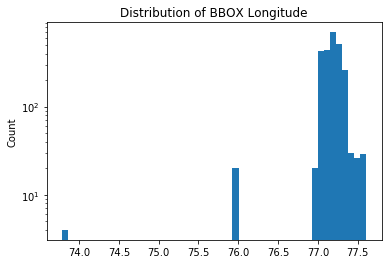

In [68]:
plt.figure(figsize=(6,4))
plt.hist(lat_lons[:, 1], bins = 50)
plt.title("Distribution of BBOX Longitude")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

In [69]:
print(np.max(lat_lons[:, 1]))

77.6094148845


In [70]:
print(np.min(lat_lons[:, 1][lat_lons[:, 1] > 76.5]))

76.96172955846873


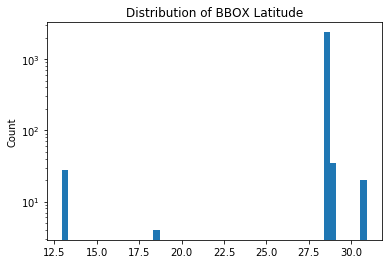

In [71]:
plt.figure(figsize=(6,4))
plt.hist(lat_lons[:, 0], bins = 50)
plt.title("Distribution of BBOX Latitude")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

In [72]:
print(np.max(lat_lons[:, 0][lat_lons[:, 0] < 30.0]))

28.768498991804968


In [73]:
print(np.min(lat_lons[:, 0][lat_lons[:, 0] > 25.0]))

28.449826652402077


In [89]:
ll = []
for o_df in orders_df:
    ll.extend(orders_df[0].customer_lat_lng.str.split(',').values.tolist())

In [91]:
lat = [float(i[0]) for i in ll]
lon = [float(i[1]) for i in ll]

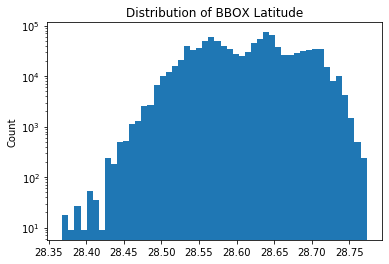

In [93]:
plt.figure(figsize=(6,4))
plt.hist(lat, bins = 50)
plt.title("Distribution of BBOX Latitude")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

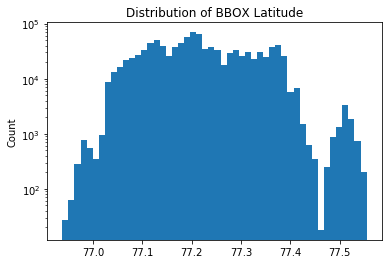

In [94]:
plt.figure(figsize=(6,4))
plt.hist(lon, bins = 50)
plt.title("Distribution of BBOX Latitude")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

In [96]:
print(np.min(np.array(lat)))
print(np.max(np.array(lat)))
print(np.min(np.array(lon)))
print(np.max(np.array(lon)))

28.36802
28.773167
76.9374551
77.554957


In [108]:
z_ids = (c_z_df.id.tolist())

In [121]:
a_ids = a_df[a_df.zone_id.isin(z_ids)].area_id.values.tolist()

In [123]:
r_df = r_df[r_df['enabled'] == 1]

In [124]:
r_df = r_df[r_df.area_code.isin(a_ids)]

In [125]:
r_df.shape

(10491, 29)

In [134]:
r_df.head()

,id,name,area_code,type,with_de,lat_long,enabled,archived,batching_enabled,third_party_delivery_enabled,prep_time_peak,max_banner_factor,max_second_mile,rain_mode,jit_enabled,address_verified,partner_id,self_delivery_override,fixed_sla,serviceable,max_active_orders,vendor_rain_mode,polygon_id,max_long_distance_last_mile,trust_rest_prep_time,o2p_buffer,jit_enabled_soft_tagging,is_long_distance_enabled,batching_version
1323,1624,RP's The Family Restaurant,63,F,0,"28.54046998773757,77.21833990674588",1,0.00000,1,1,25,3.00000,10.00000,1,0,1,19.00000,0,nan,1,nan,1,nan,10.00000,0,7.20600,0,1,2
1324,1625,Tunday Kababi,63,F,0,"28.54043701402948,77.21264726679533",1,0.00000,1,1,25,3.00000,4.50000,1,0,1,19.00000,0,nan,1,nan,1,nan,9.50000,0,5.42500,0,1,2
1325,1626,Tunday Kababi,401,F,0,"28.562547687479057,77.24466968832587",1,0.00000,1,0,28,3.00000,4.50000,1,0,1,2.00000,0,nan,1,nan,1,nan,9.50000,0,6.04100,0,1,2
1326,1627,Litti.in,63,F,0,"28.537173,77.20995800000003",1,0.00000,1,1,25,3.00000,4.50000,1,0,1,3.00000,0,nan,1,nan,1,nan,9.50000,0,3.97500,0,1,2
1327,1628,Kathi,63,F,0,"28.530847967666887,77.21882648346707",1,0.00000,1,1,25,3.00000,10.00000,1,0,1,3.00000,0,nan,1,nan,1,nan,nan,0,4.52000,0,0,2


In [126]:
ll = r_df.lat_long.str.split(',').values.tolist()

In [136]:
lat = np.array([float(i[0]) for i in ll])
lon = np.array([float(i[1]) for i in ll])

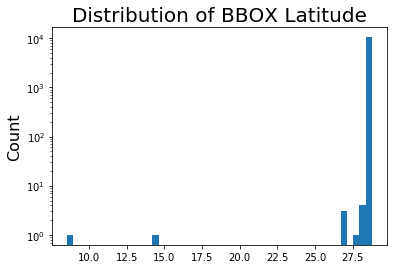

In [137]:
plt.figure(figsize=(6,4))
plt.hist(lat, bins = 50)
plt.title("Distribution of BBOX Latitude")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

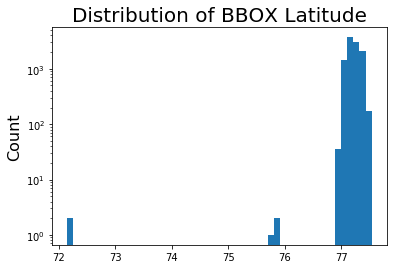

In [138]:
plt.figure(figsize=(6,4))
plt.hist(lon, bins = 50)
plt.title("Distribution of BBOX Latitude")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

In [142]:
print(np.min(np.array(lat[lat > 25])))
print(np.max(np.array(lat)))
print(np.min(np.array(lon[lon > 76])))
print(np.max(np.array(lon)))

26.799099
28.76103973388672
76.90333299999998
77.53216299999997
